# COMP3314 HW1-Q4: Hand-written Digits Classification (20 points)

In chapter 3 sample codes, we applied different scikit-learn classifiers for the Iris data set. In this question, we will use the classifiers over another data set: hand-written digits.

Your tasks:

1. Split the dataset into a training set and a test set.
2. Create classifiers from scikit-learn and set their hyper-parameters. The classifiers include:
   * Perceptron
   * Logistic regression
   * SVM
   * Decision tree
   * Random forest
   * kNN
3. Train your classifiers with the training set.
4. Evaluate your classifiers with the test set.
5. Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?


In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


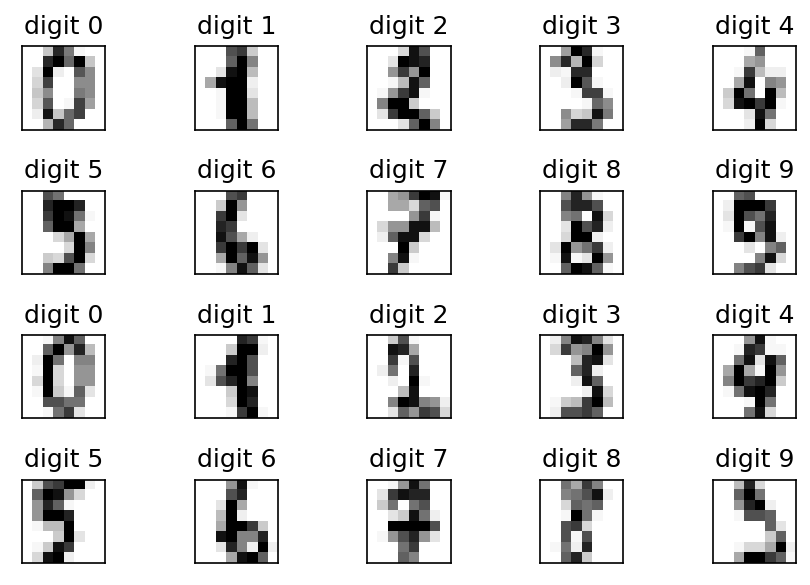

In [2]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

def get_accuracy(ys, ys_pred):
    assert ys.shape == ys_pred.shape
    assert ys.ndim == 1
    return np.sum(ys == ys_pred) / len(ys)

xs_train, xs_test, ys_train, ys_test = train_test_split(xs,
                                                        ys,
                                                        test_size=0.1,
                                                        stratify=ys)

## Classifier #1 Perceptron

In [4]:
# Example code, including training and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

# Tune the eta0 hyperparameter.
eat0_list = [0.0001, 0.001, 0.01, 0.1, 1]

# Your code here.
accuracies = []
for eta0 in eat0_list:
    model = Perceptron(max_iter=100, tol=1e-3, eta0=eta0)
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies.append(accuracy)

for eta0, accuracy in zip(eat0_list, accuracies):
    print(f"eta0 = {eta0:.4f}, accuracy = {accuracy:.4f}")

eta0 = 0.0001, accuracy = 0.9333
eta0 = 0.0010, accuracy = 0.9222
eta0 = 0.0100, accuracy = 0.9222
eta0 = 0.1000, accuracy = 0.9167
eta0 = 1.0000, accuracy = 0.9222


## Classifier #2 Logistic Regression

In [15]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.linear_model import LogisticRegression

# Tune the C hyperparameter.
C_list = [1e-3, 0.001, 0.01, 1, 10, 100]

# Your code here.
accuracies1 = []
for C in C_list:
    model = LogisticRegression(C=C, tol=1e-3,multi_class="ovr",solver='liblinear',max_iter=100,penalty='l2')
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies1.append(accuracy)

for C, accuracy in zip(C_list, accuracies1):
    print(f"C = {C:.4f}, accuracy = {accuracy:.4f}")

C = 0.0010, accuracy = 0.9667
C = 0.0010, accuracy = 0.9667
C = 0.0100, accuracy = 0.9722
C = 1.0000, accuracy = 0.9611
C = 10.0000, accuracy = 0.9556
C = 100.0000, accuracy = 0.9556


## Classifier #3 SVM

In [49]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.linear_model import SGDClassifier

# Tune the alpha hyperparameter.
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Your code here.
accuracies2 = []
for a in alpha_list:
    model = SGDClassifier(alpha=a, tol=1e-3,max_iter=100,penalty='l2', random_state = 1)
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies2.append(accuracy)

for a, accuracy in zip(alpha_list, accuracies2):
    print(f"alpha = {a:4f}, accuracy = {accuracy:.4f}")

alpha = 0.000100, accuracy = 0.9389
alpha = 0.001000, accuracy = 0.9611
alpha = 0.010000, accuracy = 0.9500
alpha = 0.100000, accuracy = 0.9556
alpha = 1.000000, accuracy = 0.9611
alpha = 10.000000, accuracy = 0.9056


## Classifier #4 Decision Tree

In [46]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.tree import DecisionTreeClassifier

# Tune the max_depth hyperparameter.
max_depth_list = [12, 25, 50, None]

# Your code here.
accuracies3 = []
for h in max_depth_list:
    model = DecisionTreeClassifier(criterion="gini",max_depth=h,random_state = 1)
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies3.append(accuracy)

for h, accuracy in zip(max_depth_list, accuracies3):
    if h:
        print(f"max_depth = {h:4}, accuracy = {accuracy:.4f}")
    else:
        print(f"max_depth = {h}, accuracy = {accuracy:.4f}")

max_depth =   12, accuracy = 0.8611
max_depth =   25, accuracy = 0.8500
max_depth =   50, accuracy = 0.8500
max_depth = None, accuracy = 0.8500


## Classifier #5 Random Forest

In [54]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.ensemble import RandomForestClassifier

# Tune the n_estimators hyperparameter.
n_estimators_list = [10, 50, 100, 200]

# Your code here.
accuracies4 = []
for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, criterion="gini", n_jobs=5, max_depth=None)
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies4.append(accuracy)

for n, accuracy in zip(n_estimators_list, accuracies4):
    print(f"n_estimator = {n:3}, accuracy = {accuracy:.4f}")

n_estimator =  10, accuracy = 0.9500
n_estimator =  50, accuracy = 0.9667
n_estimator = 100, accuracy = 0.9722
n_estimator = 200, accuracy = 0.9667


## Classifier #6 KNN

In [50]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.neighbors import KNeighborsClassifier

# Tune the n_neighbors hyperparameter.
n_neighbors_list = [2, 3, 5, 10, 20]

# Your code here.
accuracies5 = []
for n in n_neighbors_list:
    model = KNeighborsClassifier(n_neighbors=n,p=2, metric="minkowski")
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies5.append(accuracy)

for n, accuracy in zip(n_neighbors_list, accuracies5):
    print(f"n_neighbors = {n:2}, accuracy = {accuracy:.4f}")

n_neighbors =  2, accuracy = 0.9833
n_neighbors =  3, accuracy = 0.9833
n_neighbors =  5, accuracy = 0.9778
n_neighbors = 10, accuracy = 0.9778
n_neighbors = 20, accuracy = 0.9778


## Discussions

Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

### Answer:

Since we have already to test different parameters. We can use the best accuracy to represent the accuracy of each classifier.

1. Perceptron 0.9333
2. Logistic Regression (OvR) 0.9722
3. SVM 0.9611
4. Decision Tree 0.8611
5. Random Forest 0.9667
6. KNN 0.9833

Therefore, we conclude that Decision Tree is the worst while KNN is the best.

Decision tree is the worst. Because it has so many possible nodes to split. Each pixel can be regarded as an attribute.

KNN is the best according to the accuracy. However, it is a lazy algorithm. It uses up a lot of memory. When the data is numerous, it costs a lot. Random Forest and Logistic Regression are also good classifiers.